# Spearman Correlation
The idea is to analyse the correlation between the disease rates and suicide rates in each municipality.

Import libraries

In [3]:
import pandas as pd
import glob
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

root = "../"

Read suicide csv

In [5]:
suicide = pd.read_csv(root + 'CSV/Suicide/suicide_rates_08_18.csv', sep=',', index_col=0)
suicide

,MUNCOD,RATE_08,RATE_09,RATE_10,RATE_11,RATE_12,RATE_13,RATE_14,RATE_15,RATE_16,RATE_17,RATE_18
0,110001,20.344224,8.212203,8.189337,4.127456,12.464166,7.773632,3.898332,11.728829,7.841292,11.793844,4.316485
1,110002,9.458389,2.338060,4.427031,4.368243,9.703818,1.974938,4.860976,4.789226,5.665936,9.315758,1.883807
2,110003,0.000000,14.936520,0.000000,0.000000,0.000000,15.396459,0.000000,31.471282,15.900779,0.000000,18.389114
3,110004,5.110972,7.626311,2.544497,1.266480,5.042229,1.164646,5.776607,6.878683,10.241588,5.649271,9.432516
4,110005,0.000000,0.000000,11.743981,0.000000,11.868028,0.000000,0.000000,11.119760,11.136478,5.576001,6.081245
...,...,...,...,...,...,...,...,...,...,...,...,...
5376,522200,7.874636,0.000000,15.937525,15.817779,15.702285,0.000000,7.494566,0.000000,0.000000,7.312614,0.000000
5377,522205,0.000000,0.000000,0.000000,0.000000,13.199578,12.605572,0.000000,12.238404,0.000000,0.000000,0.000000
5378,522220,67.249496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5379,522230,0.000000,18.660198,0.000000,0.000000,0.000000,18.315018,0.000000,0.000000,0.000000,0.000000,0.000000


Read disease files

In [74]:
disease = ""
path = root + "CSV/TabNet/Rates/"
all_files = glob.glob(path + "*.csv")

years = ["08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18"]

final_df = pd.DataFrame()


for year in years:
    col_year = "RATE_" + year
    year_df = suicide[[col_year, "MUNCOD"]]
    year_df = year_df.rename(columns={col_year: "SUICIDE_RATE"})
    for file in all_files:
        file_name = file.split("\\")[1]
        disease = file_name.split("_RATE")[0]
        
        disease_df = pd.read_csv(path + disease + '_RATE_08_18.csv', sep=',', index_col=0)
        disease_df = disease_df[[col_year, "MUNCOD"]]
        disease_df = disease_df.rename(columns={col_year: disease})

        year_df = pd.merge(disease_df, year_df, left_on="MUNCOD", right_on="MUNCOD")

    year_df = year_df.drop("MUNCOD", axis=1)
    final_df = pd.concat([final_df, year_df])
    
final_df
        

,TRAUMATISMO_INTRACRANIANO,TRANSTORNOS_MENTAIS,TECIDO_MOLE,OSTEOPOROSE,INSUFICIENCIA_RENAL,INSUFICIENCIA_CARDIACA,HIV,HIPERTENSAO,ESCLEROSE_MULTIPLA,EPILEPSIA,ENXAQUECA,DPOC,DORSOPATIAS,DOENCA_DE_PARKINSON,DOENCA_CARDIACA,DIABETES_MELLITUS,CANCER,ASMA,SUICIDE_RATE
0,52.894983,12.206535,0.000000,4.068845,4.068845,248.199536,0.000000,537.087521,0.000000,16.275379,0.000000,248.199536,162.753794,0.000000,28.481914,219.717622,12.206535,777.149367,20.344224
1,6.988853,0.000000,0.000000,0.000000,0.000000,45.427543,3.494426,213.160010,0.000000,6.988853,0.000000,87.360660,41.933117,0.000000,20.966558,69.888528,48.921969,66.394101,0.000000
2,27.800945,35.214531,1.853396,0.000000,9.266982,129.737744,1.853396,42.628116,0.000000,18.533963,0.000000,83.402836,9.266982,0.000000,20.387360,155.685293,51.895098,87.109628,1.853396
3,88.521954,5.419711,9.032852,1.806570,65.036538,274.598716,7.226282,167.107771,0.000000,18.065705,0.000000,122.846794,46.067548,0.903285,40.647836,200.529325,74.972676,127.363220,10.839423
4,16.154219,13.461849,8.077109,0.000000,16.154219,105.002423,2.692370,204.620107,0.000000,18.846589,5.384740,210.004846,21.538959,0.000000,24.231328,145.387970,45.770287,110.387163,16.154219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,40.989450,129.205874,18.712575,9.801825,17.821500,45.444825,16.930425,4.455375,0.000000,10.692900,0.891075,8.019675,0.891075,0.000000,86.434274,11.583975,335.044197,6.237525,4.455375
965,51.863909,111.706881,28.724627,9.574876,43.086940,129.260820,23.937189,3.989531,0.000000,15.160220,0.797906,26.330908,6.383250,0.000000,180.326822,44.682752,210.647262,9.574876,7.181157
966,29.139829,35.210626,9.713276,9.106196,32.782307,64.350455,7.892037,6.677877,4.249558,20.033632,1.214160,21.854872,9.713276,0.000000,87.419486,21.854872,138.414186,25.497350,4.249558
967,21.824531,225.520151,7.274844,29.099374,36.374218,552.888113,0.000000,87.298123,0.000000,109.122654,14.549687,109.122654,36.374218,0.000000,181.871090,123.672341,312.818274,327.367962,0.000000


In [75]:
diseases_list = []
corrs_list = []
p_value_list = []

for file in all_files:
    file_name = file.split("\\")[1]
    disease = file_name.split("_RATE")[0]
    
    # Spearman correlation
    file_array = final_df[disease]
    suicides_array = final_df["SUICIDE_RATE"]
    corr, p_value = spearmanr(file_array,suicides_array)
    
    # Append correlation
    diseases_list.append(disease)
    corrs_list.append(corr)
    p_value_list.append(p_value)

Spearman correlations table ranked from highest to lowest

In [76]:
corrs_data = {'Doenças': diseases_list, 'Correlação com suicidio': corrs_list, 'P value': p_value_list}
corrs_df = pd.DataFrame(data=corrs_data)
corrs_df.sort_values(by=['Correlação com suicidio'], ascending=False)

,Doenças,Correlação com suicidio,P value
6,DPOC,0.235102,8.637847e-134
16,TRANSTORNOS_MENTAIS,0.206129,1.252023e-102
1,CANCER,0.200386,5.559042e-97
3,DOENCA_CARDIACA,0.166788,2.380136e-67
12,INSUFICIENCIA_CARDIACA,0.139756,1.241860e-47
13,INSUFICIENCIA_RENAL,0.136440,1.842204e-45
2,DIABETES_MELLITUS,0.093324,4.685326e-22
15,TECIDO_MOLE,0.091984,1.803963e-21
14,OSTEOPOROSE,0.091327,3.472431e-21
5,DORSOPATIAS,0.079088,2.908879e-16


Heatmap

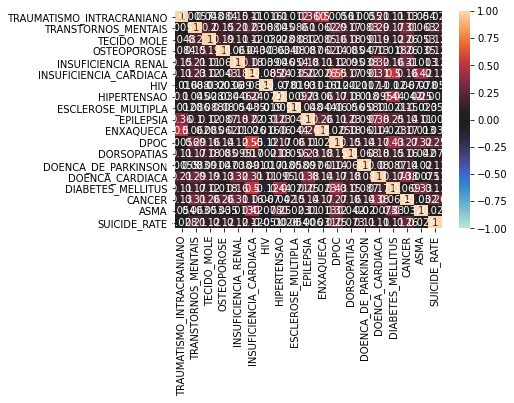

In [77]:
sns.heatmap(final_df.corr(), annot=True, vmin=-1, vmax=1, center=0)